In [12]:
import matplotlib.pyplot as plt
import numpy as np

# from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import california_housing
from keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    ReLU,
    Softmax,
)
from keras.losses import MeanSquaredError as MSELoss
from keras.metrics import MeanSquaredError as MSEMetric
from keras.models import Sequential
from keras.optimizers import Adam

# from sklearn.preprocessing import StandardScaler

# from keras.utils import plot_model

In [13]:
(X_train, y_train), (X_test, y_test) = california_housing.load_data()

In [14]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [15]:
model = Sequential(
    layers=[
        Input(shape=(8,)),
        Dense(128),
        ReLU(),
        Dense(64),
        ReLU(),
        Dense(32),
        ReLU(),
        Dense(1),
    ],
    name="ann",
)

In [16]:
model.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=MSELoss(), optimizer=Adam(), metrics=[MSEMetric()]) # type: ignore

In [18]:
ann_history = model.fit(
    X_train, y_train, batch_size=32, epochs=200, validation_split=0.2
)

Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30555471872.0000 - mean_squared_error: 30555471872.0000 - val_loss: 23839483904.0000 - val_mean_squared_error: 23839483904.0000
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 17070972928.0000 - mean_squared_error: 17070972928.0000 - val_loss: 12141419520.0000 - val_mean_squared_error: 12141419520.0000
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11232733184.0000 - mean_squared_error: 11232733184.0000 - val_loss: 10878801920.0000 - val_mean_squared_error: 10878801920.0000
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 10736652288.0000 - mean_squared_error: 10736652288.0000 - val_loss: 10405411840.0000 - val_mean_squared_error: 10405411840.0000
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 10387391488.0000 - mean_squared_error: 10387391488.0000 - val_loss: 10596786176.0000 - val_mean_squared_error: 10596786176.0000
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

In [20]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["mean_squared_error"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_mean_squared_error"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 4972428824.32
Validation loss: 4981772069.12
4972428824.320000 Training accuracy with a standard deviation of 2371042578.593780
4981772069.120000 Validation accuracy with a standard deviation of 1860642765.262636


Text(0.5, 1.0, 'Training and Validation Loss')

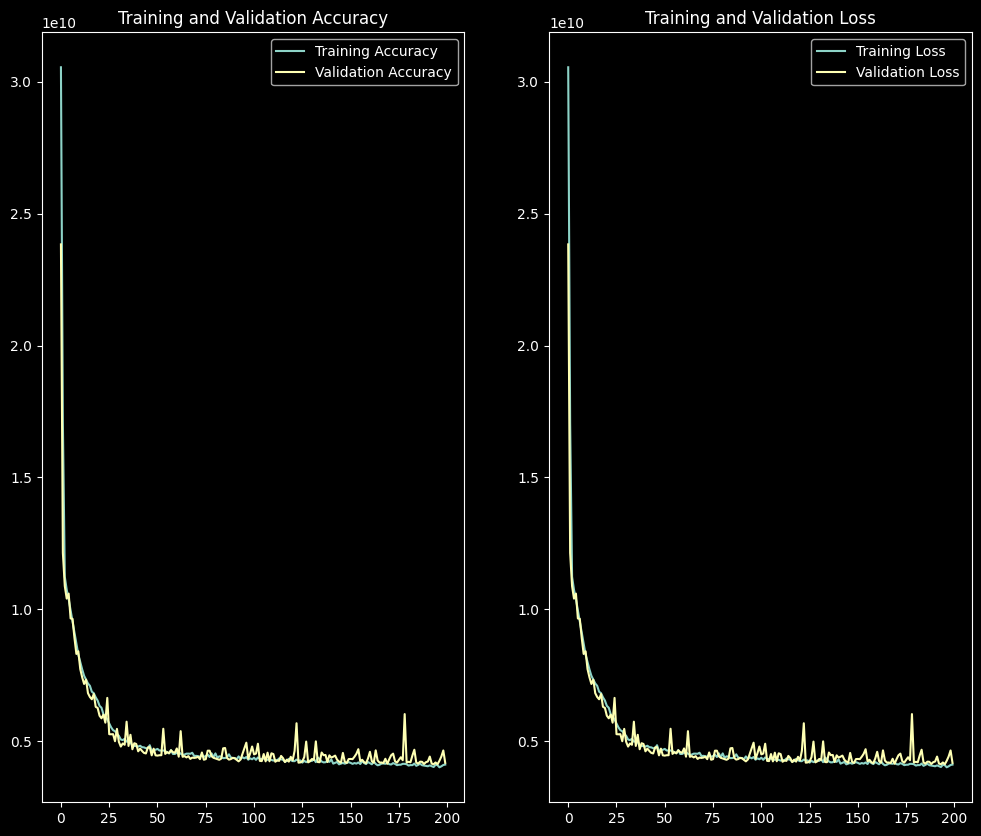

In [21]:
epochs_range = range(200)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

In [22]:
ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 4098640384.0000 - mean_squared_error: 4098640384.0000
Test loss: 4098640384.0
Test accuracy: 4098640384.0


In [23]:
y_pred = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
